In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.interpolate import interp1d

from ClassFunctions import precip_time_series, rainfall_analysis

## Create object containing rainfall events for one gauge

In [ ]:
# Path to data file
raw_data_file = "../Raw_data/Sample1.csv"

# Create an object with the rainfall time series 
ts = precip_time_series(raw_data_file)

# Pad and resample the timeseries so it is at 5 minute resolution, and there are no missing times
ts.pad_and_resample('5min')

# Create on the object a set of filtered events
ts.get_events()

# Create on the object a set of dimensionless curves
ts.create_dimensionless_events()

# Create on the object a set of dimensionless curves
ts.create_interpolated_events()

In [ ]:
## Get examples for one event
event_idx  = 1
event = ts.return_specific_event(event_idx)
dimensionless_cumulative_event =  ts.return_specific_dimensionless_event(event_idx)
interpolated_dimensionless_cumulative_event =  ts.return_specific_interpolated_event(event_idx)

# Can do something similar with
# ts.events[event_idx] # This returns the start and end timestamp
# ts.dimensionless_events[event_idx]
# ts.interpolated_events[event_idx]

## Compute metrics

In [ ]:
analysis = rainfall_analysis(ts)
analysis.get_metrics()

### See all the metrics

In [ ]:
analysis.metrics['intermittency']

### See all the values for one metric

## Create plots for one event

In [7]:
event_idx = 7
event = ts.return_specific_event(event_idx)

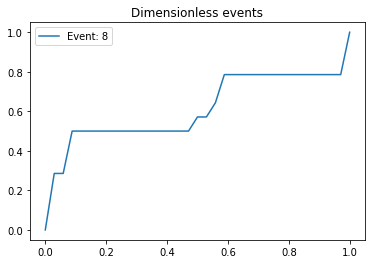

In [8]:
ts.plot_specific_dimensionless_event(7)

## Create plots of overall results

In [14]:
# ts.plot_all_events()

In [10]:
# ts.plot_specific_event_w_hist(event_idx=1)

In [11]:
# ts.plot_specific_dimensionless_events([0,1,2,3,4,5,6,7,8,9])

In [12]:
# analysis.plot_boxplots(analysis.metrics.keys())
# analysis.plot_histograms(analysis.metrics.keys())

## Create Correlation matrix

In [42]:
first_five_metrics = dict(list(analysis.metrics.items())[11:13])
# first_five_metrics
# Create a DataFrame using just those keys/values
# df = pd.DataFrame(first_five_metrics)

In [44]:
# analysis.metrics.keys()
analysis.metrics['ttp'] # rcg and ttp

array([[5.000e+00],
       [8.200e+02],
       [3.050e+02],
       [1.250e+03],
       [2.305e+03],
       [2.350e+02],
       [5.200e+02],
       [5.000e+00],
       [2.550e+02],
       [3.850e+02],
       [1.460e+03],
       [5.000e+00],
       [3.700e+02],
       [4.500e+01],
       [1.565e+03],
       [2.500e+01],
       [5.000e+00],
       [9.650e+02],
       [1.550e+02],
       [1.000e+01],
       [1.650e+02],
       [4.150e+02],
       [4.500e+01],
       [1.750e+02],
       [1.550e+02],
       [3.500e+01],
       [7.700e+02],
       [2.220e+03],
       [4.450e+02],
       [2.000e+02],
       [3.150e+02],
       [1.800e+02],
       [5.000e+00],
       [6.000e+02],
       [5.500e+01],
       [1.000e+01],
       [2.000e+01],
       [1.120e+03],
       [2.525e+03],
       [1.095e+03],
       [2.050e+02],
       [1.000e+01],
       [3.500e+01],
       [7.500e+01],
       [4.650e+02],
       [7.250e+02],
       [7.730e+03]], dtype=float32)

In [13]:
# max_intensity = analysis.metrics['max_intensity']
# mean_intensity = analysis.metrics['mean_intensity']
# I30 = analysis.metrics['intermittency']
# std_intensity = analysis.metrics['std']

analysis.metrics.keys()

df = pd.DataFrame({'max_intensity': analysis.metrics['max_intensity'],
                    'mean_intensity': analysis.metrics['mean_intensity'],
                    'intermittency': analysis.metrics['intermittency'],                   
                   'pmr': analysis.metrics['pmr'],
                   'I30': analysis.metrics['I30'],
                   'std': analysis.metrics['m1']})

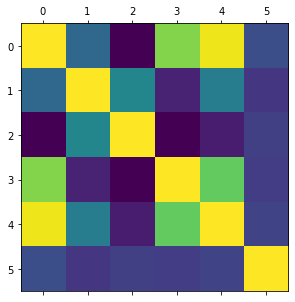

In [14]:
plt.matshow(df.corr())
plt.show()